In [1]:
%load_ext autoreload
%autoreload 2

In [86]:
import os
from os.path import join, abspath
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

In [3]:
import sys
sys.path.insert(0, abspath("./../../"))

In [4]:
from utils.pandas import apply_filters
from utils_local import colors_v1, read_spreadsheet

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Load result file

In [6]:
df = read_spreadsheet(gid_key="dataset_size")
df.dropna(inplace=True)

In [7]:
dataset_full_size = {
    "UCF": "9500",
    "NTU": "40300",
    "Gym99": "20500",
    "SS": "169000",
}

In [8]:
for d, v in dataset_full_size.items():
    indices = (df.Dataset == d) * (df["Dataset size"] == "Full")
    df.at[indices, "Dataset size (float)"] = v

In [9]:
df["Dataset size (float)"] = df["Dataset size (float)"].astype(float)

In [10]:
df["Dataset size (float)"] = df["Dataset size (float)"].fillna(df["Dataset size"]).astype(float)

In [11]:
df

,Method,Dataset,Dataset size,Top-1,Dataset size (float)
0,No pretraining,UCF,1000,43.14,1000.0
1,SELAVI,UCF,1000,69.18,1000.0
2,RSPNET,UCF,1000,75.68,1000.0
3,Video Moco,UCF,1000,65.82,1000.0
4,Pretext-Contrast,UCF,1000,62.70,1000.0
...,...,...,...,...,...
305,TCLR,SS,Full,59.97,169000.0
306,GDT,SS,Full,57.78,169000.0
307,AVID-CMA,SS,Full,53.82,169000.0
308,MoCo,SS,Full,56.96,169000.0


### Plot single dataset

In [14]:
df.Dataset.unique()

array(['UCF', 'NTU', 'Gym99', 'SS'], dtype=object)

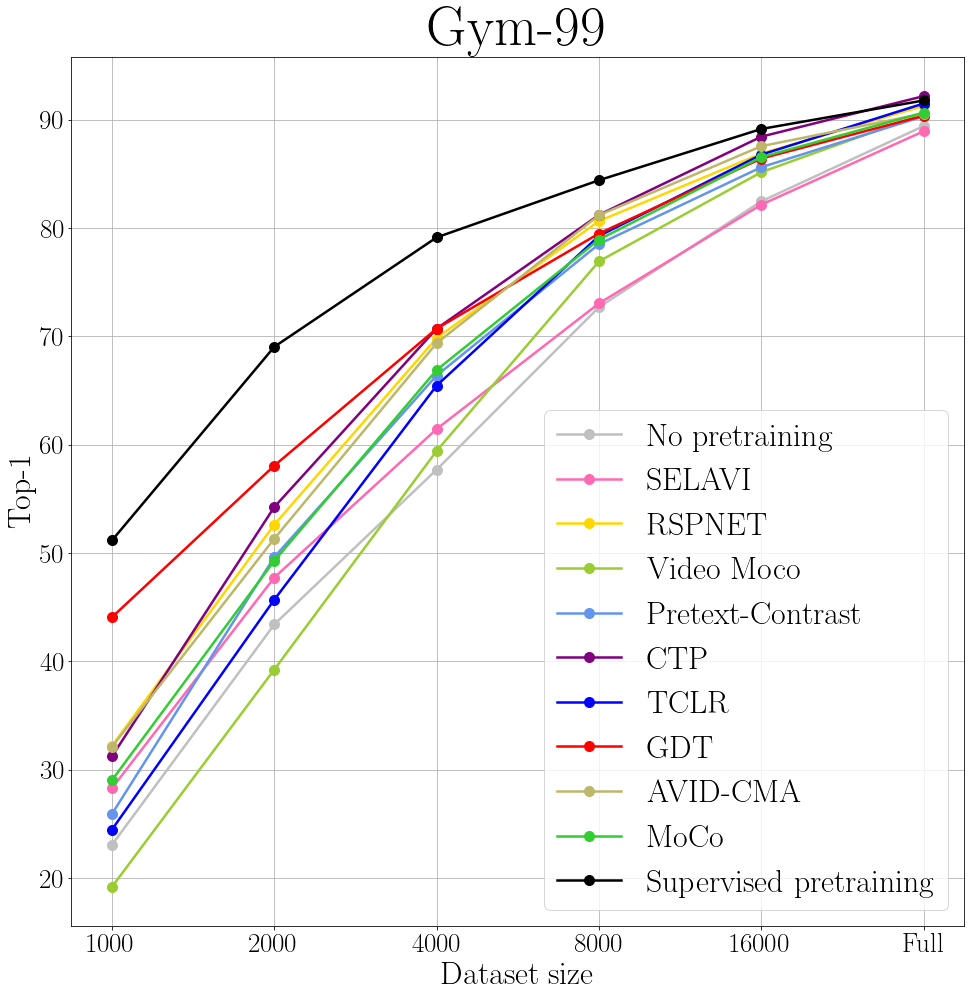

In [34]:
dataset = "Gym99"
dataset_to_title = {
    "SS": "SS-v2",
    "UCF": "UCF-101",
    "NTU": "NTU-60",
    "Gym99": "Gym-99",
}

sub_df = df[df["Dataset"] == dataset]

methods = list(sub_df.Method.unique())

W=16
H=16
figsize=(W, H)

titlesize = W * 3.5
legendsize = W * 2.0
xlabelsize = W * 2.0
ylabelsize = H * 2.0
xtickssize = W * 1.7
ytickssize = H * 1.7

linewidth = 2.5
markersize = 15.0
legend = True

x = "Dataset size"
y = "Top-1"

colors = colors_v1

fig, ax = plt.subplots(figsize=figsize)

for i, m in enumerate(methods):
    subsub_df = apply_filters(sub_df, {"Method": m})
    markersize = 10.0
    # if m == "Video Moco":
    #     markersize=20
    ax.plot(
        subsub_df[x],
        subsub_df['Top-1'],
        label=m, marker="o", markersize=markersize, linewidth=linewidth, color=colors[i],
    )

ax.set_title(dataset_to_title[dataset], fontsize=titlesize)

ax.set_xlabel(x, fontsize=xlabelsize)
ax.tick_params(axis='x', labelsize=xtickssize)

ax.set_ylabel(y, fontsize=xlabelsize)
ax.tick_params(axis='y', labelsize=ytickssize)

ax.grid()
if legend:
    ax.legend(fontsize=legendsize, loc="lower right")

save_path = f"../../results/plots/domain_shift_{dataset}_v3.pdf"
os.system(f"rm -rf {save_path}")
plt.savefig(save_path, bbox_inches="tight")
plt.show()

### Plot actual dataset sizes on the x-axis

In [12]:
dataset_to_title = {
    "SS": "SS-v2",
    "UCF": "UCF-101",
    "NTU": "NTU-60",
    "Gym99": "Gym-99",
}

In [13]:
alphas = defaultdict(lambda: 1.)
# alphas.update({
#     'No pretraining': 0.3,
#     'SELAVI': 0.5,
#     'RSPNET': 0.5,
#     'TCLR': 1.0,
#     'Supervised pretraining': 1.0,
#     'GDT': 1.0,
# })

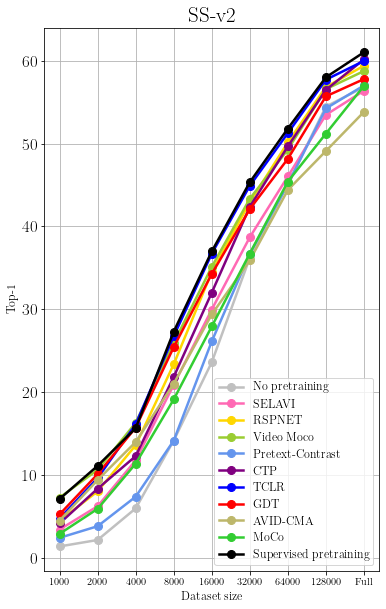

In [14]:
dataset = "SS"

sub_df = df[df["Dataset"] == dataset]

methods = list(sub_df.Method.unique())

W=6
H=10
figsize=(W, H)

titlesize = W * 3.5
legendsize = W * 2.0
xlabelsize = W * 2.0
ylabelsize = H * 2.0
xtickssize = W * 1.7
ytickssize = H * 1.7
markersize = 0.8 * max(H,W)

linewidth = 2.5
# markersize = 15.0
legend = True

x = "Dataset size"
y = "Top-1"

colors = colors_v1

fig, ax = plt.subplots(figsize=figsize)

for i, m in enumerate(methods):
    subsub_df = apply_filters(sub_df, {"Method": m})

    ax.plot(
        subsub_df[x],
        subsub_df['Top-1'],
        label=m, marker="o", markersize=markersize, linewidth=linewidth, color=colors[i], alpha=alphas[m],
    )

ax.set_title(dataset_to_title[dataset], fontsize=titlesize)

ax.set_xlabel(x, fontsize=xlabelsize)
# ax.set_xscale('log')
# ax.set_xticks(subsub_df["Dataset size (float)"].unique())
ax.tick_params(axis='x', labelsize=xtickssize)

ax.set_ylabel(y, fontsize=xlabelsize)
ax.tick_params(axis='y', labelsize=ytickssize)


ax.grid()
if legend:
    ax.legend(fontsize=legendsize, loc="lower right")

save_path = f"../../results/plots/domain_shift_vs_dataset_size_{dataset}_v3.pdf"
os.system(f"rm -rf {save_path}")
plt.savefig(save_path, bbox_inches="tight")
plt.show()

In [14]:
from utils_local import markers_v1

In [15]:
df["Dataset size ($10^{3}$)"] = (df["Dataset size (float)"] / 1000.).astype(int).astype(str)
df["Dataset size"] = (df["Dataset size (float)"]).astype(int).astype(str)

df["Top-1 (%)"] = df["Top-1"]

In [17]:
# change the order
methods = [
    'No pretraining',
    'SELAVI',
    'RSPNET',
    'Video Moco',
    'Pretext-Contrast',
    'TCLR',
    'AVID-CMA',
    'MoCo',
    'Supervised pretraining',
    'CTP',
    'GDT',
]

### Final improvements (beautifying)

In [12]:
dataset_to_title = {
    "SS": "SS-v2",
    "UCF": "UCF-101",
    "NTU": "NTU-60",
    "Gym99": "Gym-99",
}

In [13]:
alphas = defaultdict(lambda: 1.)


In [14]:
# change the order
methods = [
    'No pretraining',
    'SELAVI',
    'RSPNET',
    'Video Moco',
    'Pretext-Contrast',
    'TCLR',
    'AVID-CMA',
    'MoCo',
    'Supervised pretraining',
    'CTP',
    'GDT',
]

In [15]:
import matplotlib

cmap = 'Spectral'
cmap = "rainbow"
# cmap = "jet"
# cmap = "gist_ncar"
cmap = matplotlib.cm.get_cmap(cmap)

colors_v2 = [cmap(1-x) for x in np.linspace(0., 1.0, len(colors_v1))]

In [16]:
cmap = matplotlib.cm.get_cmap("rainbow")
colors_v3 = [cmap(1-x) for x in np.linspace(0., 1.0, len(colors_v1) // 2)]

cmap = matplotlib.cm.get_cmap("Set3")
colors_v3 += [cmap(1-x) for x in np.linspace(0., 1.0, len(colors_v1) // 2 + 1)]

In [17]:
# cmap = "rainbow"
# cmap = "Set2"
# cmap = "Paired"
# cmap = "hls"
# cmap = "gist_ncar"

cmap = "tab10"
cmap = sns.color_palette(cmap, as_cmap=True)
colors_v4 = [cmap(x) for x in np.linspace(0., 1.0, len(colors_v1))]
colors_v4[methods.index("No pretraining")] = "darkgray"
colors_v4[methods.index("Supervised pretraining")] = "black"
# colors_v4[methods.index("GDT")] = "gold"
colors_v4[methods.index("GDT")] = "goldenrod"

# colors_v4 = sns.color_palette("pastel", as_cmap=True)

In [18]:
scattercolors_v1 = [
    "gray",
    "darkgoldenrod",
    "green",
    "red",
    "indigo",
    "darkblue",
    "chocolate",
    "olive",
    "black",
    "salmon",
    "crimson",
]

linecolors = [
    "darkgray",
    "yellow",
    "lightgreen",
    "pink",
    "violet",
    # "lightcyan",
    "turquoise",
    "peachpuff",
    "greenyellow",
    "black",
    # "mistyrose",
    "blue",
    "red", # "pink"
]


assert len(scattercolors_v1) == len(linecolors)

In [19]:
# colors = colors_v1
# colors = colors_v2
# colors = colors_v3
colors = colors_v4
# colors = linecolors

In [20]:
method_to_color = dict(zip(methods, colors))
method_to_scattercolor = dict(zip(methods, scattercolors_v1))
method_to_scattercolor = dict(zip(methods, colors))

In [57]:
df["Dataset size (with actual number instead of full)"] = df["Dataset size (float)"].astype(int).astype(str)
df["Dataset size (with actual number with log2 scale)"] = df["Dataset size (float)"].apply(np.log2)

In [61]:
 df["Dataset size (float)"].apply(np.log10)

0      3.000000
1      3.000000
2      3.000000
3      3.000000
4      3.000000
         ...   
305    5.227887
306    5.227887
307    5.227887
308    5.227887
309    5.227887
Name: Dataset size (float), Length: 297, dtype: float64

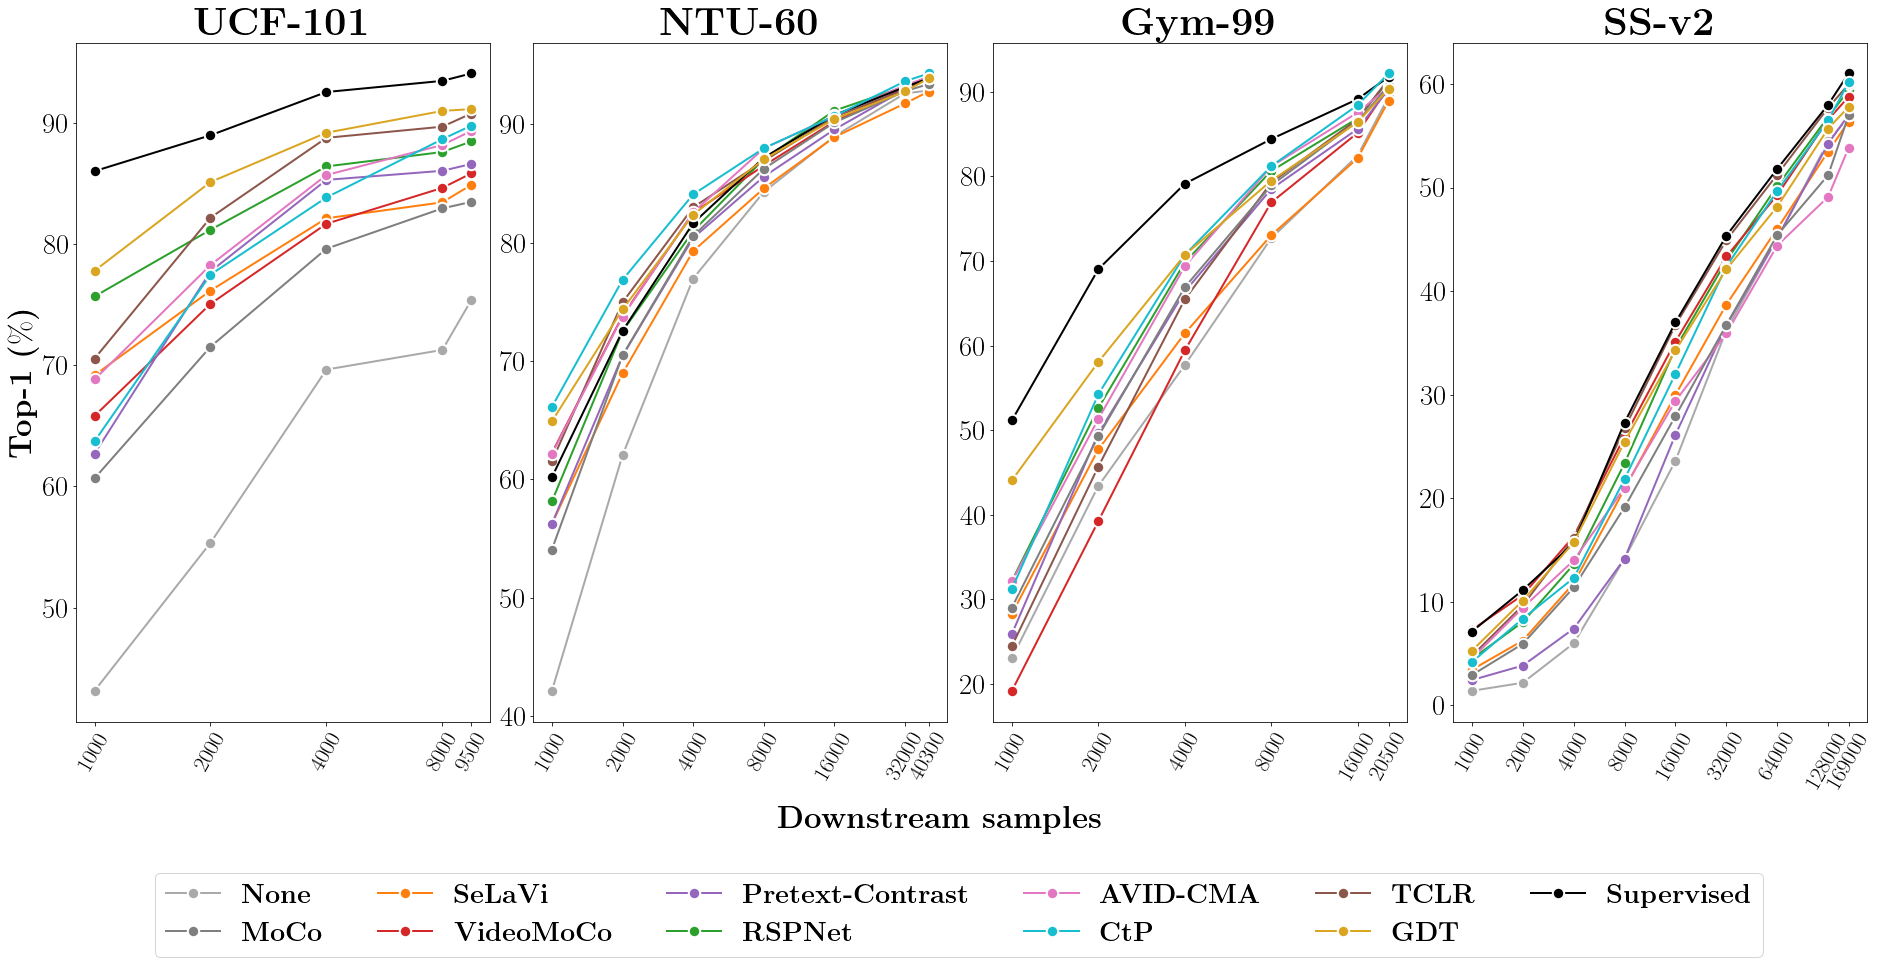

In [98]:
# OPTION 1: 1x4
# define constants


W = 6 * 4 + 2
H = 11
fig, axes = plt.subplots(1, len(df.Dataset.unique()), figsize=(W, H), constrained_layout=True)

titlesize = 0.14 * (H * W)
legendsize = 0.095 * (H * W)
ylabelsize = 0.11 * (H * W)
ytickssize = 0.1 * (H * W)
xlabelsize = 0.11 * (H * W)
xtickssize = 0.08 * (H * W)

# linewidth = 2.5
linewidth = 2.
# markersize = 0.05 * (H * W)
# markersize = 0.03 * (H * W)
# markersize = 0.035 * (H * W)
markersize = 0.04 * (H * W)
grid_alpha = 0.0
ylim = (0, 100)
ylim = None


legend = True

x = "Dataset size"
x = "Dataset size (with actual number instead of full)"
x = "Dataset size (float)"
xrotation = 60
# x = "Dataset size ($10^{3}$)"
# xrotation = 0
# x = "Dataset size (temporary)"
# y = "Top-1"
y = "Top-1 ($\%$)"


for j, dataset in enumerate(list(df.Dataset.unique())):
    sub_df = df[df["Dataset"] == dataset]

    ax = axes[j]

    for i, m in enumerate(methods):
        subsub_df = apply_filters(sub_df, {"Method": m})
        marker = "o"
        # marker=None
        # marker = markers_v1[i]

        ax.plot(
            subsub_df[x],
            subsub_df['Top-1'],
            label=m,
            marker=marker,
            markersize=markersize,
            linewidth=linewidth,
            color=method_to_color[m],
            alpha=alphas[m],
            markeredgecolor='white',
            markeredgewidth=2.0,
            markerfacecolor=method_to_scattercolor[m],
            # markerfacecolor="none",
        )
        ax.scatter(
            subsub_df[x],
            subsub_df['Top-1'],
            marker=marker,
            s=markersize,
            color=method_to_scattercolor[m],
            edgecolor='white',
            linewidth=2.0,
            # markerfacecolor="none",
        )
    
    title = "\\textbf{%s}" % dataset_to_title[dataset]
    ax.set_title(title, fontsize=titlesize)
    # ax.set_xlabel(x, fontsize=xlabelsize)
    ax.tick_params(axis='x', labelsize=xtickssize, rotation=xrotation)
    # ax.grid(alpha=grid_alpha)
    
    # log scale
    ax.set_xscale("log", base=2)

    # xticklabels = natsorted(sub_df["Dataset size (with actual number instead of full)"].unique())
    # ax.set_xticklabels(xticklabels)
    xticks = natsorted(sub_df["Dataset size (float)"].astype(int).unique())
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

    # for axis in [ax.xaxis, ax.yaxis]:
    #     formatter = ScalarFormatter()
    #     formatter.set_scientific(False)
    #     axis.set_major_formatter(formatter)


    if j > 0:
        
        # ax.axes.yaxis.set_ticklabels([]) 
        ax.tick_params(axis='y', labelsize=ytickssize)
        ax.set_ylabel("")
    else:
        ylabel = "\\textbf{%s}" % y
        ax.set_ylabel(ylabel, fontsize=ylabelsize)
        ax.tick_params(axis='y', labelsize=ytickssize)

    ax.set_ylim(ylim)

handles, labels = ax.get_legend_handles_labels()

labels_to_labels = dict(zip(labels, labels))
labels_to_labels.update({
    "No pretraining": "None",
    "Supervised pretraining": "Supervised",
})
labels = [ "\\textbf{%s}" % labels_to_labels[x] for x in labels]

# reorder order of methods in legend
reordered_indices = [0, 7, 1, 3, 4, 2, 6, 9, 5, 10, 8]

reordered_labels = [labels[i] for i in reordered_indices]
reordered_handles = [handles[i] for i in reordered_indices]

# rename certain methods
name_mapping = {
    "\\textbf{SELAVI}": "\\textbf{SeLaVi}",
    "\\textbf{Video Moco}": "\\textbf{VideoMoCo}",
    "\\textbf{RSPNET}": "\\textbf{RSPNet}",
    "\\textbf{CTP}": "\\textbf{CtP}",
}
reordered_renamed_labels = [name_mapping.get(x, x) for x in reordered_labels]

fig.legend(
    reordered_handles, reordered_renamed_labels, ncol=len(methods) // 2 + 1,
    fontsize=legendsize, loc="lower center", bbox_to_anchor=(0.51,-0.22),
)

# remove_borders(fig, ax)

fig.text(0.5, -0.04, '\\textbf{Downstream samples}', ha='center', fontsize=xlabelsize)
# fig.text(0.5, -0.04, '\\textbf{Downstream samples} (%s)'%cmap.name.replace("_", "-"), ha='center', fontsize=xlabelsize)
# fig.text(0.5, -0.04, '\\textbf{Downstream samples} (in $10^3$)', ha='center', fontsize=xlabelsize)

# ax.set_facecolor('xkcd:salmon')
# bg_color = (0.968, 0.972, 0.972)
# bg_color = (0.917, 0.921, 0.921)
# ax.set_facecolor(bg_color)
# ax.grid(color="white")

plt.savefig("../../results/plots/dataset_size_1x4_v11.pdf", bbox_inches="tight")
plt.show()

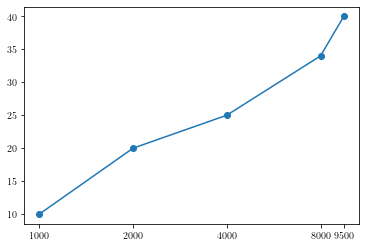

In [94]:
fig, ax = plt.subplots(1, 1)

x = [1000, 2000, 4000, 8000, 9500]
y = [10., 20., 25.,34.,40.]

ax.plot(x, y, "o-")
ax.set_xscale("log", base=2)

ax.set_xticks(x)
ax.set_xticklabels(x)

plt.show()

In [93]:
ax.get_xticks()

array([  256.,   512.,  1024.,  2048.,  4096.,  8192., 16384., 32768.])

In [88]:
ax.get_xticks()

array([1.280000e+02, 5.120000e+02, 2.048000e+03, 8.192000e+03,
       3.276800e+04, 1.310720e+05, 5.242880e+05, 2.097152e+06])

In [89]:
xticklabels

['1000', '2000', '4000', '8000', '16000', '32000', '64000', '128000', '169000']

In [70]:
ax.get_xticks()

array([1.280000e+02, 5.120000e+02, 2.048000e+03, 8.192000e+03,
       3.276800e+04, 1.310720e+05, 5.242880e+05, 2.097152e+06])

In [71]:
ax.get_xticklabels()

[Text(128.0, 0, '$\\mathdefault{2^{7}}$'),
 Text(512.0, 0, '$\\mathdefault{2^{9}}$'),
 Text(2048.0, 0, '$\\mathdefault{2^{11}}$'),
 Text(8192.0, 0, '$\\mathdefault{2^{13}}$'),
 Text(32768.0, 0, '$\\mathdefault{2^{15}}$'),
 Text(131072.0, 0, '$\\mathdefault{2^{17}}$'),
 Text(524288.0, 0, '$\\mathdefault{2^{19}}$'),
 Text(2097152.0, 0, '$\\mathdefault{2^{21}}$')]

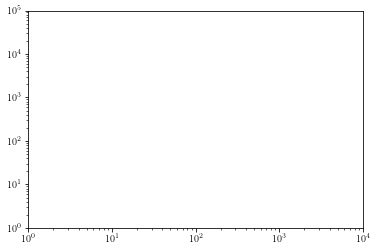

In [72]:
fig, ax = plt.subplots()
ax.axis([1, 10000, 1, 100000])
ax.loglog()

plt.show()


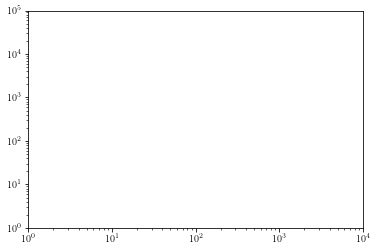

In [74]:
from matplotlib.ticker import ScalarFormatter
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

fig, ax = plt.subplots()
ax.axis([1, 10000, 1, 100000])
ax.loglog()

plt.show()


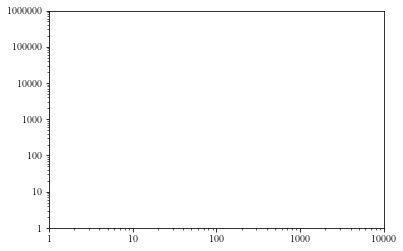

In [75]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
ax.axis([1, 10000, 1, 1000000])
ax.loglog()
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.show()


### Playground

In [80]:
def remove_borders(fig, ax):
    """
    Ref: https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    # for side in ['bottom','right','top','left']:
    for side in ['right','top']:
        ax.spines[side].set_visible(False)


In [78]:
def arrowed_spines(fig, ax):
    """
    Ref: https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    # plt.xticks([]) # labels 
    # plt.yticks([])
    # ax.xaxis.set_ticks_position('none') # tick markers
    # ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhw *= 0.5
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
    yhl *= 0.7

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


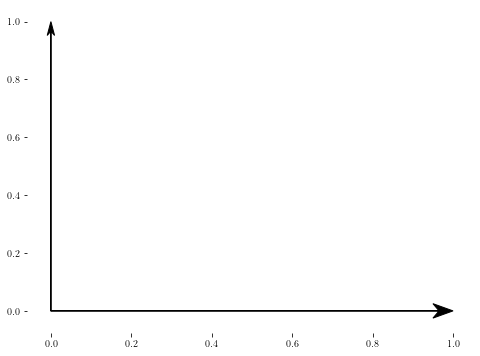

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

arrowed_spines(fig, ax)
plt.show()

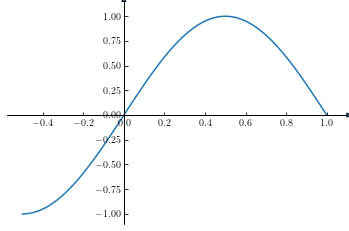

In [28]:
fig = plt.figure()
from mpl_toolkits.axisartist.axislines import SubplotZero
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

x = np.linspace(-0.5, 1., 100)
ax.plot(x, np.sin(x*np.pi))

plt.show()


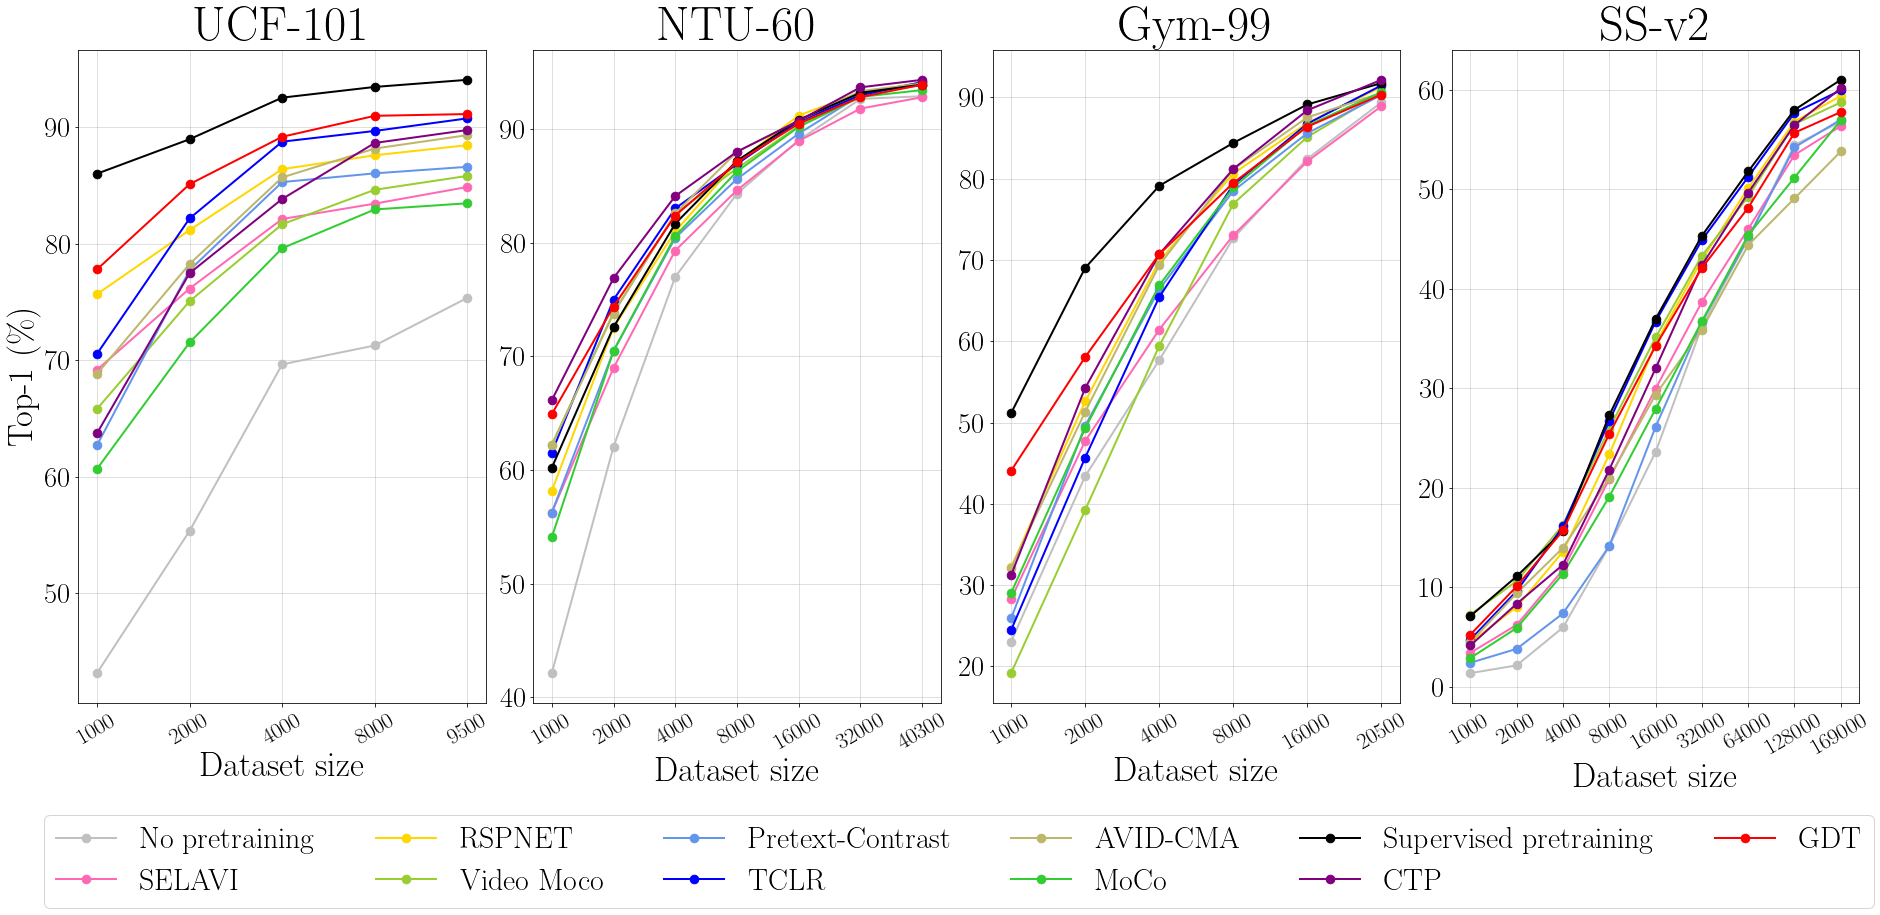

In [22]:
# OPTION 1: 1x4


# define constants


W = 6 * 4 + 2
H = 11
fig, axes = plt.subplots(1, len(df.Dataset.unique()), figsize=(W, H), constrained_layout=True)

titlesize = 0.17 * (H * W)
legendsize = 0.105 * (H * W)
ylabelsize = 0.12 * (H * W)
ytickssize = 0.1 * (H * W)
xlabelsize = 0.12 * (H * W)
xtickssize = 0.08 * (H * W)

# linewidth = 2.5
linewidth = 2.
# markersize = 0.05 * (H * W)
markersize = 0.03 * (H * W)
grid_alpha = 0.5
colors = colors_v1
ylim = (0, 100)
ylim = None

legend = True

x = "Dataset size"
# x = "Dataset size ($10^{3}$)"
# x = "Dataset size (temporary)"
# y = "Top-1"
y = "Top-1 ($\%$)"


for j, dataset in enumerate(list(df.Dataset.unique())):
    sub_df = df[df["Dataset"] == dataset]

    ax = axes[j]

    for i, m in enumerate(methods):
        subsub_df = apply_filters(sub_df, {"Method": m})
        marker = "o"
        # marker=None
        # marker = markers_v1[i]

        ax.plot(
            subsub_df[x],
            subsub_df['Top-1'],
            label=m,
            marker=marker,
            markersize=markersize,
            linewidth=linewidth,
            color=method_to_color[m],
            alpha=alphas[m],
            # markerfacecolor="none",
        )

    ax.set_title(dataset_to_title[dataset], fontsize=titlesize)
    ax.set_xlabel(x, fontsize=xlabelsize)
    ax.tick_params(axis='x', labelsize=xtickssize, rotation=30)
    ax.grid(alpha=grid_alpha)

    if j > 0:
        
        # ax.axes.yaxis.set_ticklabels([]) 
        ax.tick_params(axis='y', labelsize=ytickssize)
        ax.set_ylabel("")
    else:
        ax.set_ylabel(y, fontsize=ylabelsize)
        ax.tick_params(axis='y', labelsize=ytickssize)

    ax.set_ylim(ylim)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(methods) // 2 + 1, fontsize=legendsize, loc="lower center", bbox_to_anchor=(0.51,-0.16))

plt.savefig("../../results/plots/dataset_size_1x4_v5.pdf", bbox_inches="tight")
plt.show()

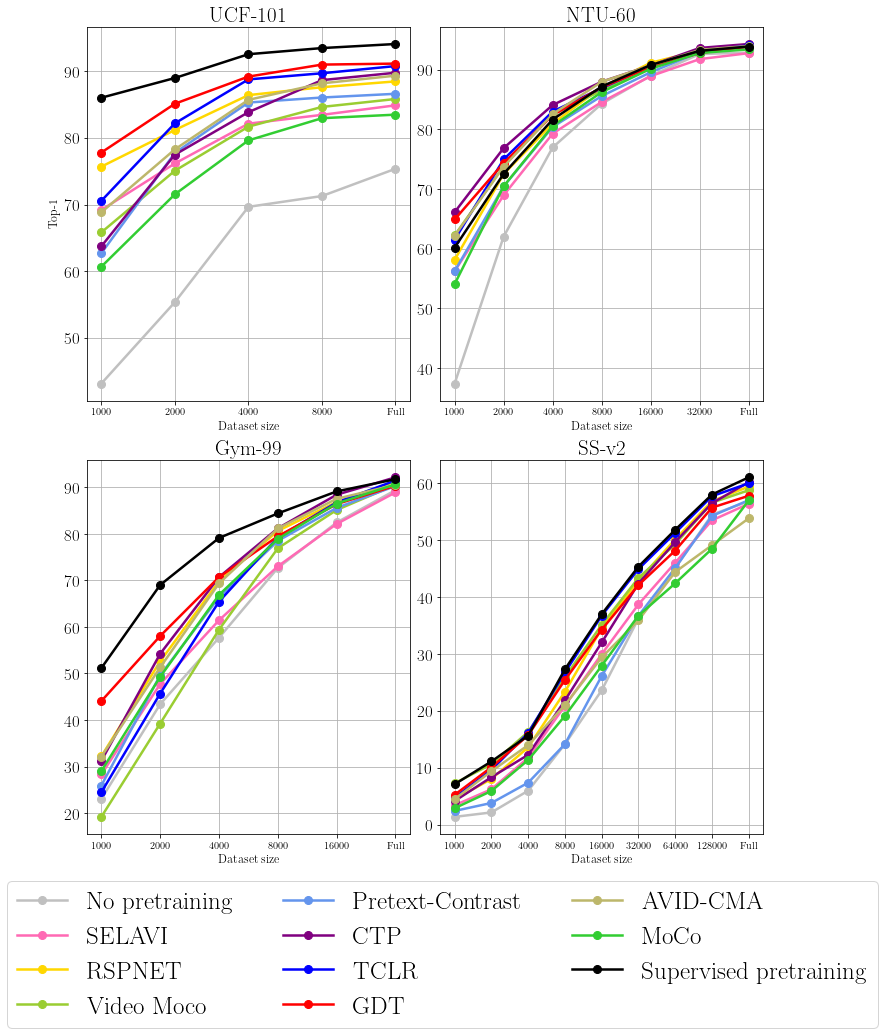

In [151]:
# OPTION 2: 2x2

fig, axes = plt.subplots(2, len(df.Dataset.unique()) // 2, figsize=(4 * 2 + 2, 6 * 2), constrained_layout=True)


for j, dataset in enumerate(list(df.Dataset.unique())):
    sub_df = df[df["Dataset"] == dataset]

    methods = list(sub_df.Method.unique())

    W=6
    H=10
    # figsize=(W, H)
    
    
    ax_i, ax_j = j // 2, j % 2
    ax = axes[ax_i, ax_j]

    titlesize = W * 3.5
    legendsize = W * 2.0
    xlabelsize = W * 2.0
    ylabelsize = H * 2.0
    xtickssize = W * 1.7
    ytickssize = H * 1.7
    markersize = 0.8 * max(H,W)

    linewidth = 2.5
    # markersize = 15.0
    legend = True

    x = "Dataset size"
    y = "Top-1"

    colors = colors_v1

    # fig, ax = plt.subplots(figsize=figsize)

    for i, m in enumerate(methods):
        subsub_df = apply_filters(sub_df, {"Method": m})

        ax.plot(
            subsub_df[x],
            subsub_df['Top-1'],
            label=m, marker="o", markersize=markersize, linewidth=linewidth, color=colors[i], alpha=alphas[m],
        )

    ax.set_title(dataset_to_title[dataset], fontsize=titlesize)

    ax.set_xlabel(x, fontsize=xlabelsize)
    # ax.set_xscale('log')
    # ax.set_xticks(subsub_df["Dataset size (float)"].unique())
    ax.tick_params(axis='x', labelsize=xtickssize)

    ax.set_ylabel(y, fontsize=xlabelsize)
    ax.tick_params(axis='y', labelsize=ytickssize)


    ax.grid()
    if j == 3:
        # ax.legend(fontsize=25, loc="lower right", bbox_to_anchor=(2.0,0.2))
        # ax.legend(ncol=len(methods), fontsize=25, loc="lower right", bbox_to_anchor=(1.0,-0.2))
        pass
        
        
    if j > 0:
        # ax.set_yticks([])
        # ax.axes.yaxis.set_ticklabels([]) 
        ax.set_ylabel("")

# plt.legend(ax.get_legend_handles_labels())

handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, fontsize=25, loc="lower center", bbox_to_anchor=(1.25,0.25))
fig.legend(handles, labels, ncol=len(methods) // 3, fontsize=25, loc="lower center", bbox_to_anchor=(0.55,-0.2))

plt.savefig("../../results/plots/sample.pdf", bbox_inches="tight")
plt.show()

### Plot for a single dataset

In [13]:
def lineplot(
        df, x, y,
        ax=None,
        hue="Method",
        style="Method",
        figsize=(10, 8),
        title="Action classification on UCF",
        legend=True,
        titlesize=22,
        labelsize=18,
        legendsize=18,
        tickssize=14,
        linewidth=2.0,
        palette=["lightgray", "gold", "skyblue", "green", "darkorange", "lightseagreen", "blue", "red", "black"],
        markers=None,
        ylim=[30, 100],
        save=False,
        show=True,
        ylabel=None,
        use_custom_yticks=False,
    ):
    if markers is None:
        markers = ["o" for _ in range(len(df[hue].unique()))]
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)

    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        style=style,
        markers=markers,
        ax=ax,
        linewidth=linewidth,
        # linestyle="--",
        palette=palette,
        legend=legend,
        markersize=10,
    )

    ax.grid()
    ax.set_title(title, fontsize=titlesize)
    
    # ax.set_yscale("log")

    if ylim is not None:
        ax.set_ylim(*ylim)

    # low, high = ylim
    # ax.set_yticks(np.linspace(low, high, 20))
    # yticks = np.logspace(low, high, num=10)
    # ax.set_yticks(yticks)

    if legend:
        ax.legend(fontsize=legendsize)
    
    # import ipdb; ipdb.set_trace()
    if use_custom_yticks:
        ax.set_yticks(ticks=ax.get_yticks())
        curr_ticks = ax.get_yticks()
        ax.set_yticks(ticks=np.linspace(curr_ticks[0], curr_ticks[-1], 15))

    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)
    
    ax.set_ylabel(ylabel)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig("../../results/plots/action_classification_ucf_datasetsize.pdf", bbox_inches="tight")
    
    if show:
        plt.show()
    
    return ax

### Plot multiple datasets together

In [14]:
def linesubplots(df, ykey="Top-1", save=False, path="../../results/plots/lineplot.pdf"):
    datasets = df.Dataset.unique()
    fig, axes = plt.subplots(1, len(datasets), figsize=(20, 5))

    for i in range(len(axes)):
        sub_df = df[df["Dataset"] == datasets[i]].copy()
        
        ylabel = "Top-1" if i == 0 else None
        legend = True if i == 1 else False
        
        ax = lineplot(
            sub_df,
            x="Dataset size",
            y=ykey,
            title=datasets[i],
            ax=axes[i],
            palette=colors_v1,
            legend=legend,
            legendsize=12,
            show=False,
            # ylim=[sub_df[ykey].min() - 5, sub_df[ykey].max() + 5],
            ylim=None,
            # ylim=[sub_df[ykey].min() - 5, 90],
            ylabel=ylabel,
        )
    
    if save:
        plt.savefig(path, bbox_inches="tight")

    plt.show()

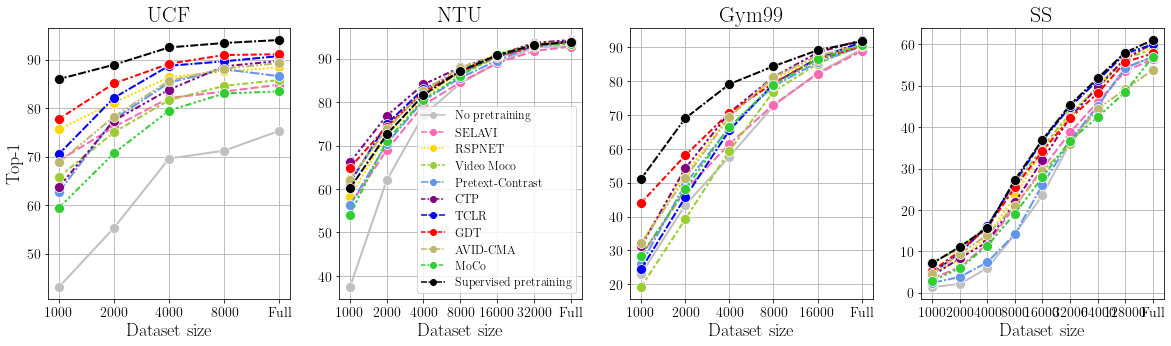

In [15]:
linesubplots(df, "Top-1", save=True, path="../../results/plots/domain_shift-dataset_size.pdf")

### Heatmaps

In [16]:
def heatmap(
        df,
        ax=None,
        figsize=(7, 6),
        title="Action classification",
        titlesize=20,
        labelsize=15,
        tickssize=13,
        save=False,
        save_path="../../results/plots/sample.pdf",
        show=True,
        **kwargs,
    ):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    if "cmap" not in kwargs:
        kwargs.update(dict(cmap="YlGnBu"))
    sns.heatmap(df, ax=ax, **kwargs)

    ax.set_title(title, fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig(save_path, bbox_inches="tight")

    if show:
        plt.show()

### Final plot

In [17]:
dataset_sizes = ["1000", "2000", "4000", "8000"]

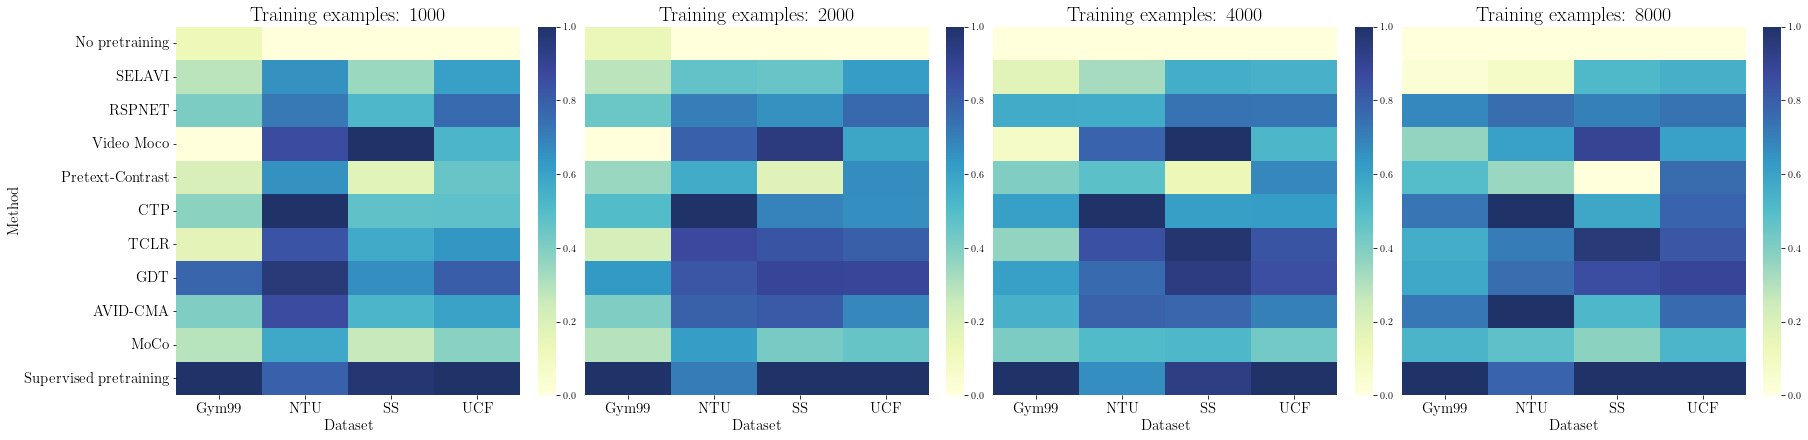

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(25, 6), constrained_layout=True)

for i, ds in enumerate(dataset_sizes):
    ax = axes[i]
    
    subdf = apply_filters(df, {"Dataset size": ds})
    pivot_df = subdf.pivot_table(index="Method", columns="Dataset")["Top-1"]
    normalized_df=(pivot_df-pivot_df.min())/(pivot_df.max()-pivot_df.min())
    normalized_df = normalized_df.reindex(list(df.Method.unique()))

    heatmap(
        normalized_df,
        ax=ax,
        title=f"Training examples: {ds}",
        titlesize=20,
        labelsize=15,
        tickssize=15,
        save=False,
        cmap="YlGnBu",
        alpha=0.9,
        # annot=annot,
        fmt='g',
        annot_kws={"size": 19},
        show=False,
    )
    
    if i > 0:
        ax.set_ylabel("")
        ax.set_yticks([])

plt.savefig("../../results/plots/training_dataset_size_heatmaps.pdf")
plt.show()

In [19]:
datasets = list(df.Dataset.unique())

In [20]:
from utils_local import colors_v1 as colors

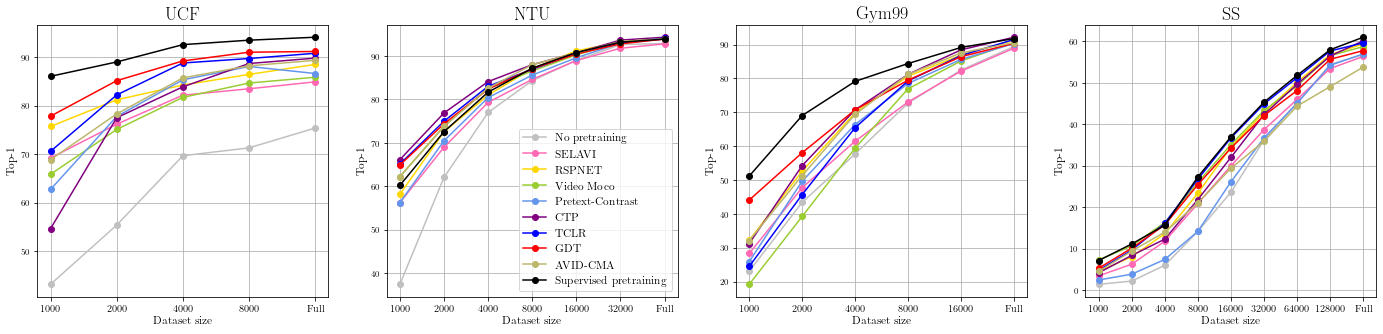

In [21]:
W=6
H=5
figsize=(4 * W, H)

titlesize = W * 3.0
legendsize = W * 1.9
xlabelsize = W * 1.9
ylabelsize = H * 1.9
xtickssize = W * 1.7
ytickssize = H * 1.7

fig, axes = plt.subplots(1, 4, figsize=figsize)

for j, d in enumerate(datasets):
    ax = axes[j]
    sub_df = apply_filters(df, {"Dataset": d})
    for i, m in enumerate(methods):
        subsub_df = apply_filters(sub_df, {"Method": m})
        ax.plot(subsub_df['Dataset size'], subsub_df['Top-1'], label=m, marker="o", markersize=6, linewidth=1.5, color=colors[i])

    ax.set_title(d, fontsize=titlesize)

    ax.set_xlabel("Dataset size", fontsize=xlabelsize)
    ax.tick_params(axis='x', labelsize=xtickssize)

    ax.set_ylabel("Top-1", fontsize=xlabelsize)
    ax.tick_params(axis='y', labelsize=ytickssize)

    ax.grid()
    if j == 1:
        ax.legend(fontsize=legendsize)

plt.show()

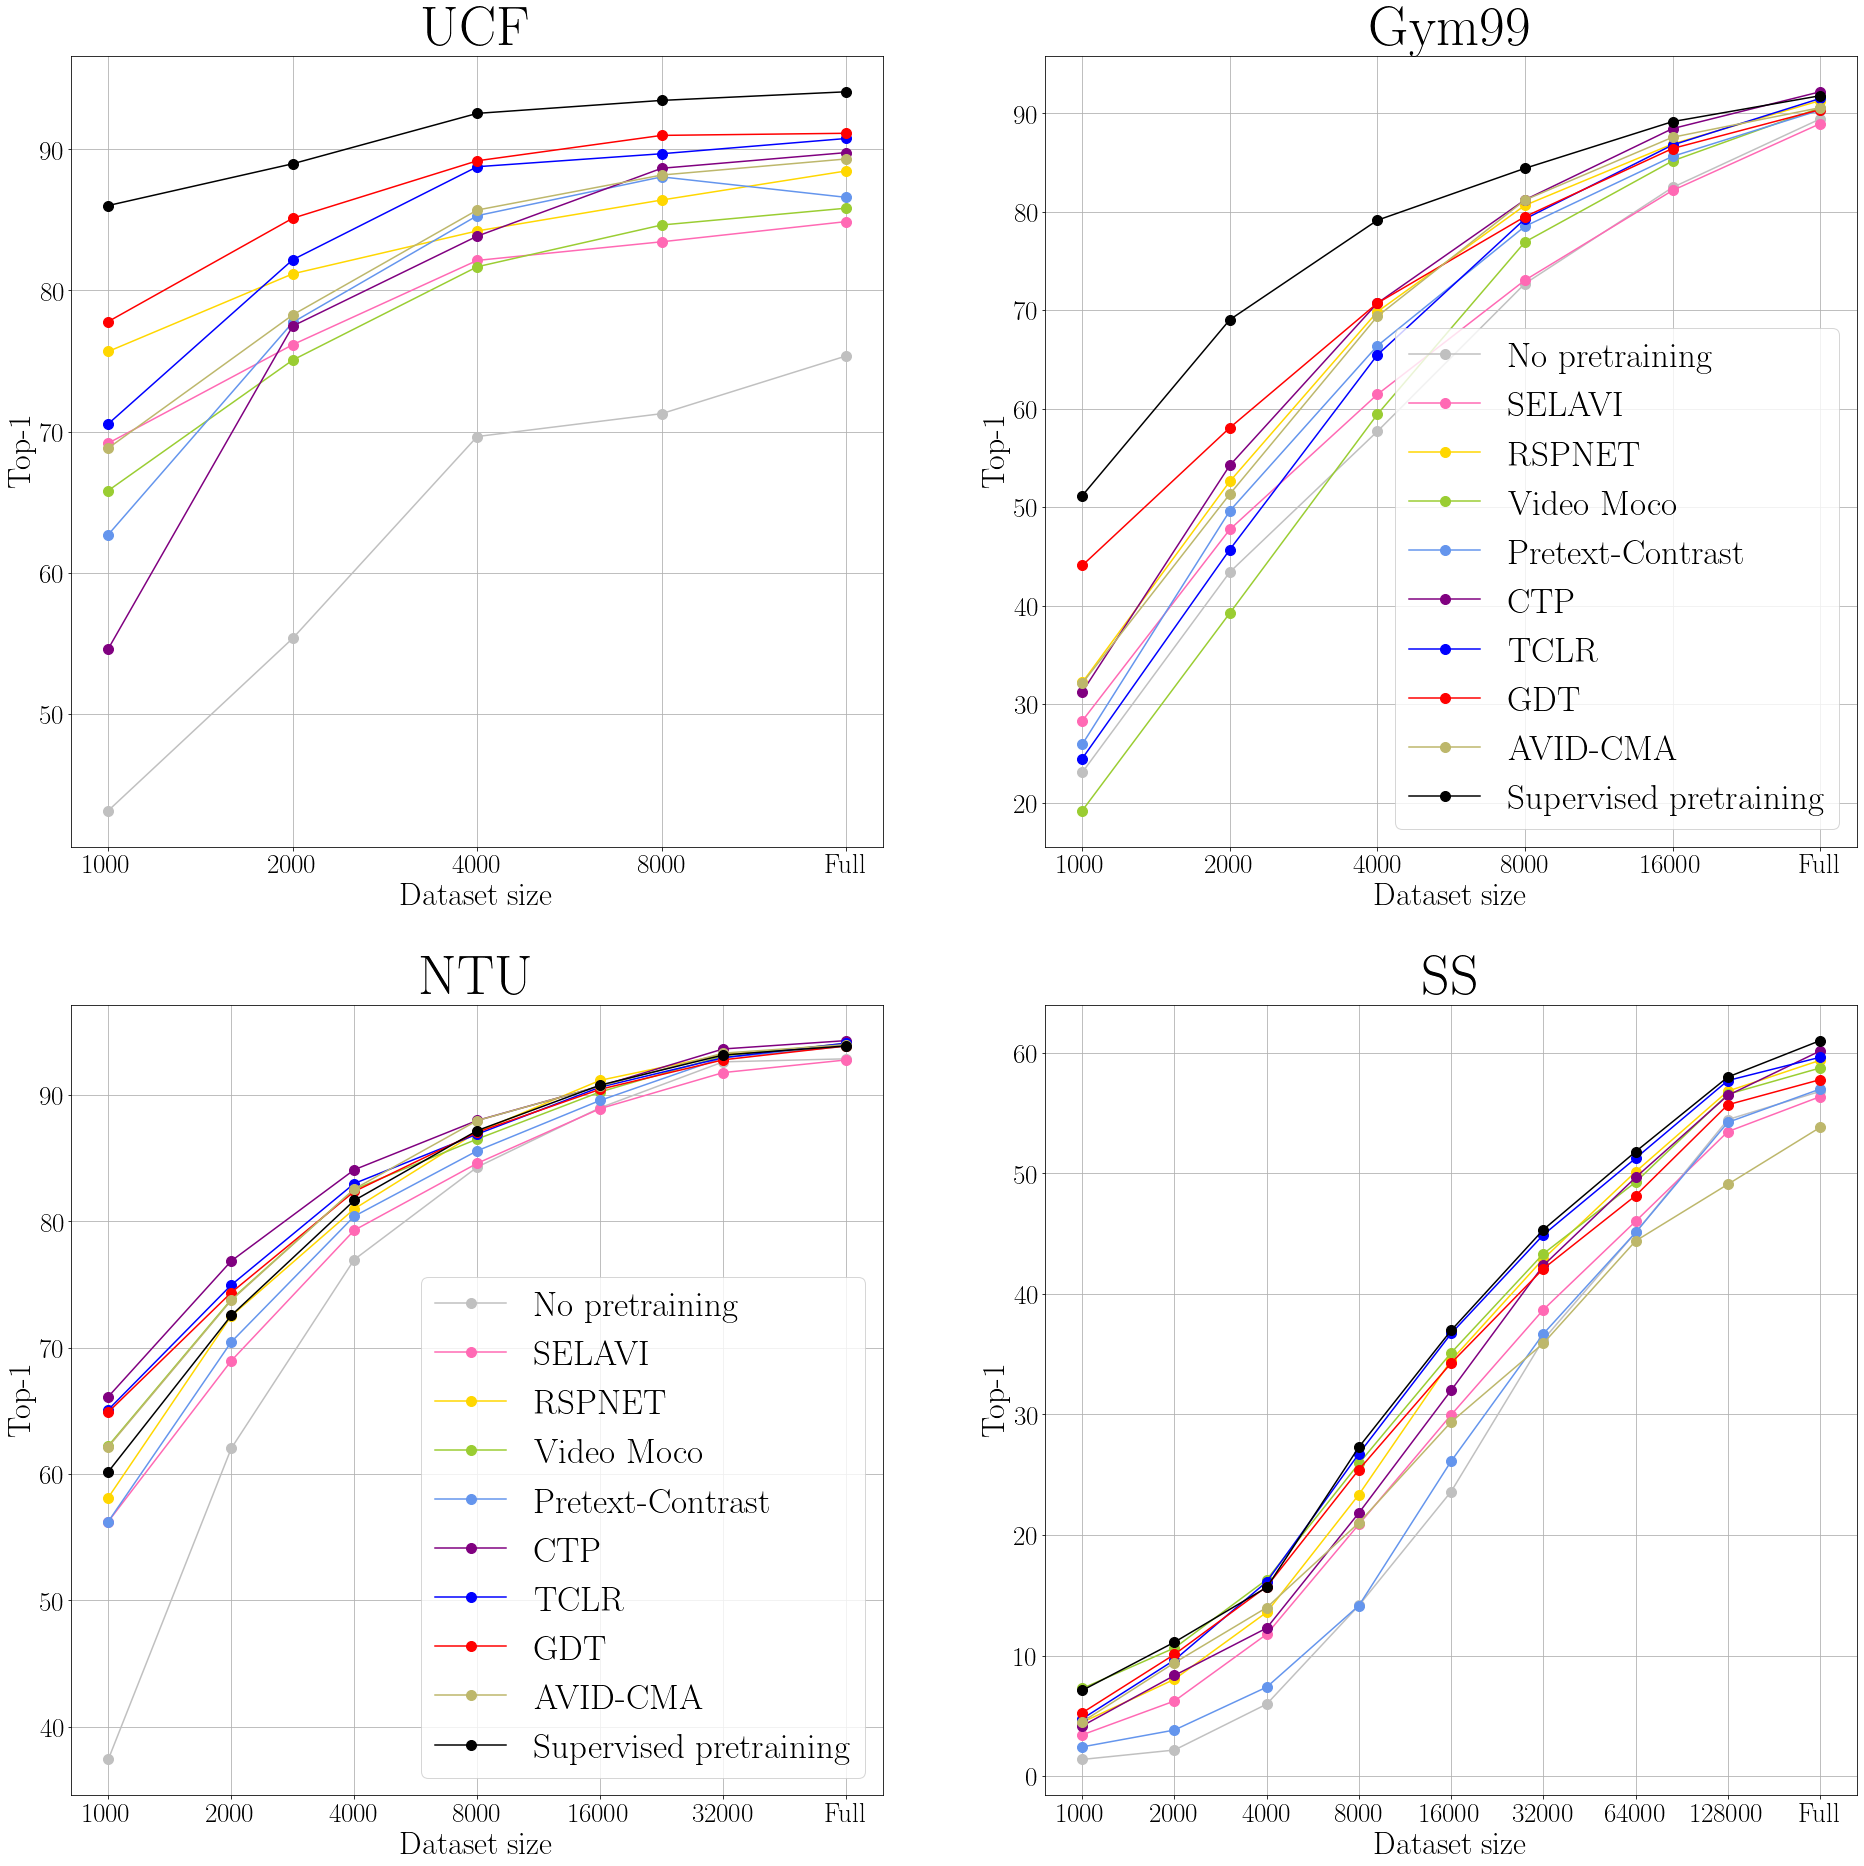

In [23]:
W=16
H=16
figsize=(2 * W, 2 * H)

titlesize = W * 3.5
legendsize = W * 2.2
xlabelsize = W * 2.0
ylabelsize = H * 2.0
xtickssize = W * 1.7
ytickssize = H * 1.7

linewidth = 1.5
markersize = 10.0
legend = False

x = "Dataset size (float)"
x = "Dataset size"
y = "Top-1"

fig, axes = plt.subplots(2, 2, figsize=figsize)


for j, d in enumerate(datasets):
    ax = axes[j%2, j//2]
    
    sub_df = apply_filters(df, {"Dataset": d})
    for i, m in enumerate(methods):
        subsub_df = apply_filters(sub_df, {"Method": m})
        ax.plot(
            subsub_df[x], subsub_df[y],
            label=m, marker="o", markersize=markersize, linewidth=linewidth, color=colors[i],
        )

    ax.set_title(d, fontsize=titlesize)
    
    # if j in [1, 3]:
    #     ax.set_xlabel(x, fontsize=xlabelsize)
    ax.set_xlabel(x, fontsize=xlabelsize)
    ax.tick_params(axis='x', labelsize=xtickssize)
    
    
    ax.set_ylabel("Top-1", fontsize=xlabelsize)
    ax.tick_params(axis='y', labelsize=ytickssize)

    ax.grid()
    if j == 1 or j == 2:
        ax.legend(fontsize=legendsize)

plt.savefig("../../results/plots/domain_shift_few_shot-2x2_grid_v2.pdf", bbox_inches="tight")
plt.show()

## Junk

### Average

In [18]:
mean_df = pd.DataFrame(None, index=df.Method.unique(), columns=df.Dataset.unique())
stdv_df = pd.DataFrame(None, index=df.Method.unique(), columns=df.Dataset.unique())

datasets = df.Dataset.unique()
for i, d in enumerate(datasets):
    mean_df[d] = apply_filters(df, {"Dataset": d}, reset_index=False).groupby("Method")["Top-1"].mean()
    stdv_df[d] = apply_filters(df, {"Dataset": d}, reset_index=False).groupby("Method")["Top-1"].std()

In [19]:
mean_df.reset_index()

,index,UCF,NTU,Gym99,SS
0,No pretraining,62.954,76.462857,61.451667,26.653333
1,SELAVI,79.160,80.372857,63.596667,29.650000
2,RSPNET,83.868,82.430000,68.905000,32.578889
3,Video Moco,78.608,83.224286,61.741667,33.688889
4,Pretext-Contrast,80.078,81.301429,66.056667,27.437778
5,CTP,80.692,84.821429,69.663333,31.924444
6,TCLR,84.392,83.954286,65.521667,34.165556
7,GDT,86.848,83.692857,71.516667,32.723333
8,AVID-CMA,82.060,83.498571,68.680000,29.056667
9,MoCo,74.914,82.651429,66.636667,27.474444


In [18]:
mean_flat_df =pd.melt(mean_df.reset_index(), id_vars=["index"])
stdv_flat_df =pd.melt(stdv_df.reset_index(), id_vars=["index"])

In [19]:
combined = pd.merge(mean_flat_df, stdv_flat_df, on=["index", "variable"])
combined.rename(columns={"value_x": "mean", "value_y": "std"}, inplace=True)

In [20]:
sns.barplot(data=apply_filters(combined, {"variable": "UCF"}), x="index", y="mean", y_e)

SyntaxError: positional argument follows keyword argument (1749656970.py, line 1)

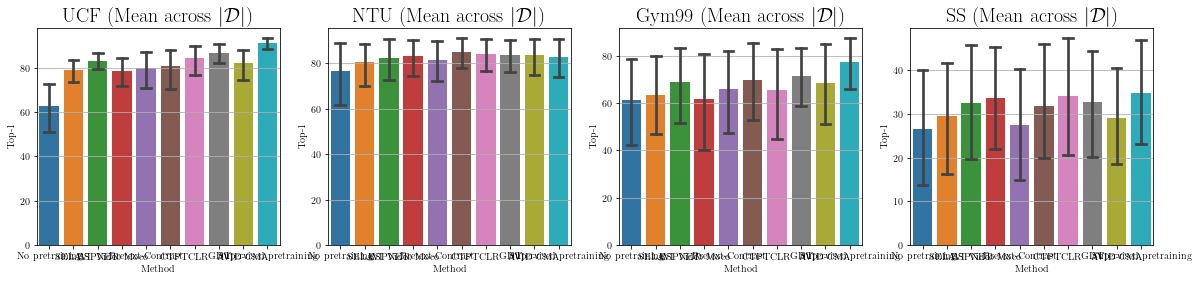

In [21]:
datasets = df.Dataset.unique()

fig, axes = plt.subplots(1, len(datasets), figsize=(20, 4))

for i, d in enumerate(datasets):
    ax = axes[i]

    ax.grid()
    ax.set_title(f"{d} " + "(Mean across $|\mathcal{D}|$)", fontsize=20)
    sns.barplot(
        data=apply_filters(df, {"Dataset": d}),
        x="Method",
        y="Top-1",
        estimator=np.mean,
        # ci=100,
        capsize=.4,
        ax=ax,
    )

plt.show()

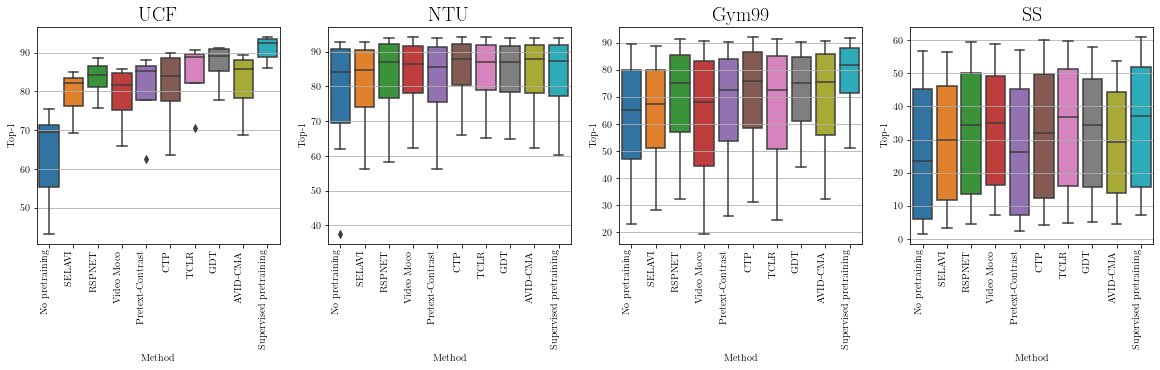

In [22]:
datasets = df.Dataset.unique()

fig, axes = plt.subplots(1, len(datasets), figsize=(20, 4))

for i, d in enumerate(datasets):
    ax = axes[i]

    ax.grid()
    ax.set_title(d, fontsize=20)
    sns.boxplot(
        data=apply_filters(df, {"Dataset": d}),
        x="Method",
        y="Top-1",
        # estimator=np.mean,
        # ci=100,
        # capsize=.4,
        ax=ax,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

<AxesSubplot:xlabel='Method', ylabel='Top-1'>

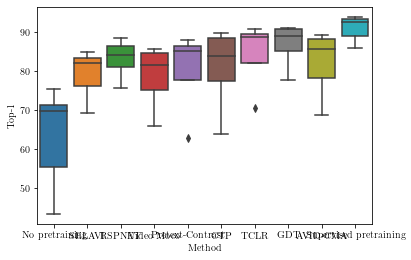

In [23]:
sns.boxplot(data=apply_filters(df, {"Dataset": "UCF"}), x="Method", y="Top-1")

<AxesSubplot:>

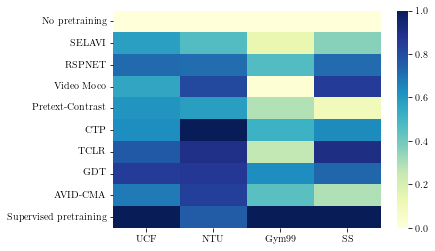

In [24]:
norm_mean_df = (mean_df - mean_df.min())/(mean_df.max() - mean_df.min())
sns.heatmap(norm_mean_df, cmap="YlGnBu")

In [25]:
apply_filters(df, {"Dataset": "UCF"}, reset_index=False).groupby("Method")["Top-1"].mean()

Method
AVID-CMA                  82.060
CTP                       80.692
GDT                       86.848
No pretraining            62.954
Pretext-Contrast          80.078
RSPNET                    83.192
SELAVI                    79.160
Supervised pretraining    91.020
TCLR                      84.392
Video Moco                78.608
Name: Top-1, dtype: float64

In [26]:
mean_df

,UCF,NTU,Gym99,SS
No pretraining,62.954,76.462857,61.451667,26.653333
SELAVI,79.160,80.372857,63.596667,29.650000
RSPNET,83.192,82.430000,68.905000,32.578889
Video Moco,78.608,83.224286,61.741667,33.688889
Pretext-Contrast,80.078,81.301429,66.056667,27.437778
CTP,80.692,84.821429,69.663333,31.924444
TCLR,84.392,83.954286,65.521667,34.165556
GDT,86.848,83.692857,71.516667,32.723333
AVID-CMA,82.060,83.498571,68.680000,29.056667
Supervised pretraining,91.020,82.778571,77.438333,34.924444


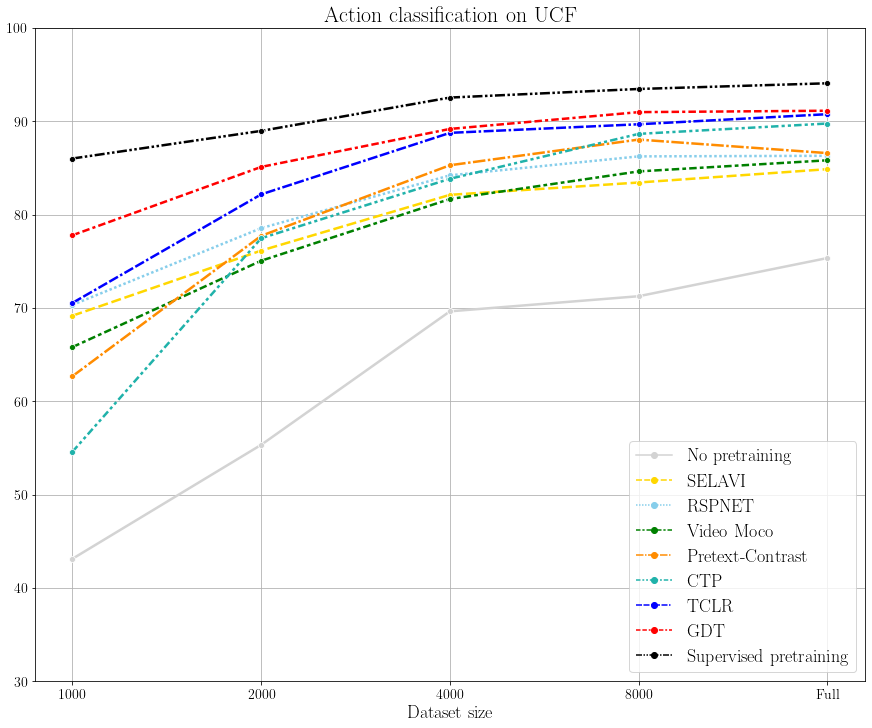

<AxesSubplot:title={'center':'Action classification on UCF'}, xlabel='Dataset size'>

In [67]:
lineplot(sub_df, x="Dataset size", y="Top-1", ylim=[30, 100], figsize=(12, 10))

In [67]:
sub_df = df[df["Dataset"] == "NTU"]

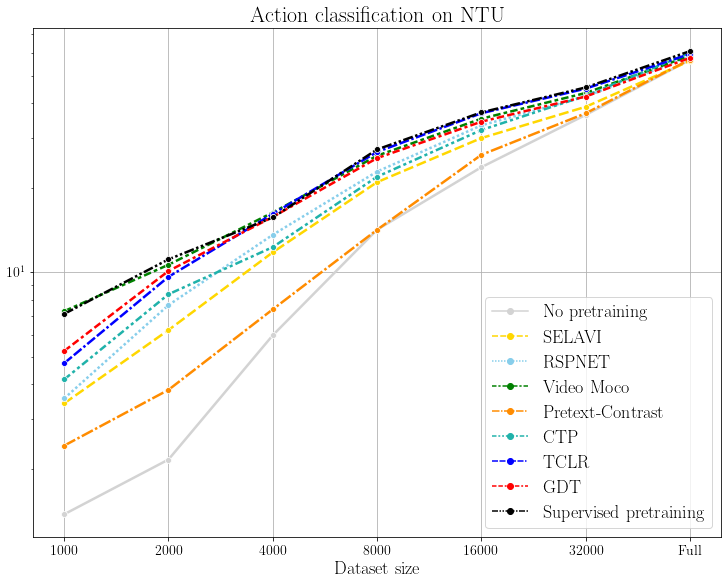

<AxesSubplot:title={'center':'Action classification on NTU'}, xlabel='Dataset size'>

In [71]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on NTU")

In [12]:
sub_df = df[df["Dataset"] == "Gym99"]

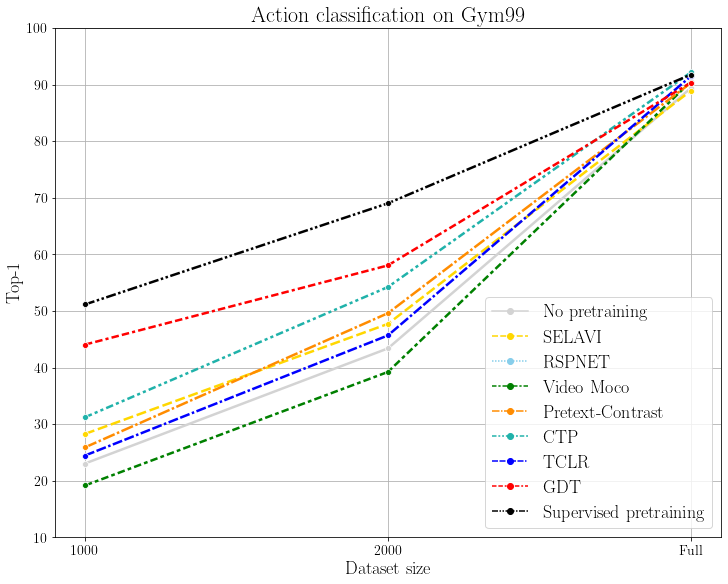

In [13]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on Gym99", ylim=[10, 100])

In [15]:
sub_df = df[df["Dataset"] == "SS"]

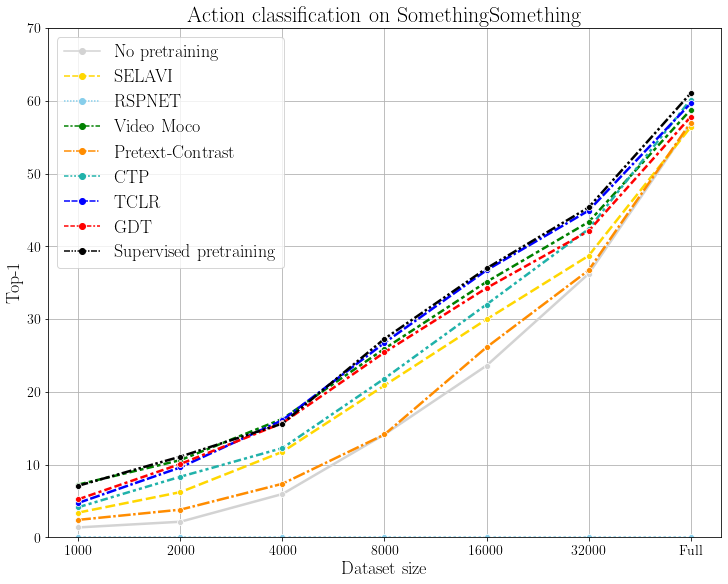

In [18]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on SomethingSomething", ylim=[0, 70])

### Rank-correlation

In [19]:
from scipy import stats

In [20]:
dataset_sizes = list(df["Dataset size"].unique())

In [21]:
rank_cor_per_size = dict()

for s in dataset_sizes:
    sub_df = apply_filters(df, {"Dataset size": s})

    datasets = list(sub_df.Dataset.unique())
    rank_cor = dict()

    for d in datasets:
        if d == "UCF":
            continue
        src = apply_filters(sub_df, {"Dataset": "UCF"})["Top-1"].argsort().values
        dst = apply_filters(sub_df, {"Dataset": d})["Top-1"].argsort().values
        if len(src) and len(dst):
            rank_cor[d] = stats.spearmanr(src, dst).correlation
    
    rank_cor_per_size[s] = rank_cor

In [22]:
pd.DataFrame(rank_cor_per_size).dropna(axis=1)

,1000,2000,4000,8000,Full
NTU,0.350000,0.583333,0.283333,0.883333,0.633333
Gym99,0.650000,0.716667,0.983333,0.816667,0.616667
SS,0.416667,0.633333,0.633333,0.600000,0.666667
